## DATASET LOOKUP

In [1]:
import os

DATASET_DIR = "./dataset/"
TRAIN_DIR = "asl_alphabet_train"
TEST_DIR = "asl_alphabet_test"

In [2]:
classes = os.listdir(os.path.join(DATASET_DIR, TRAIN_DIR))
print(classes)
len(classes)

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


29

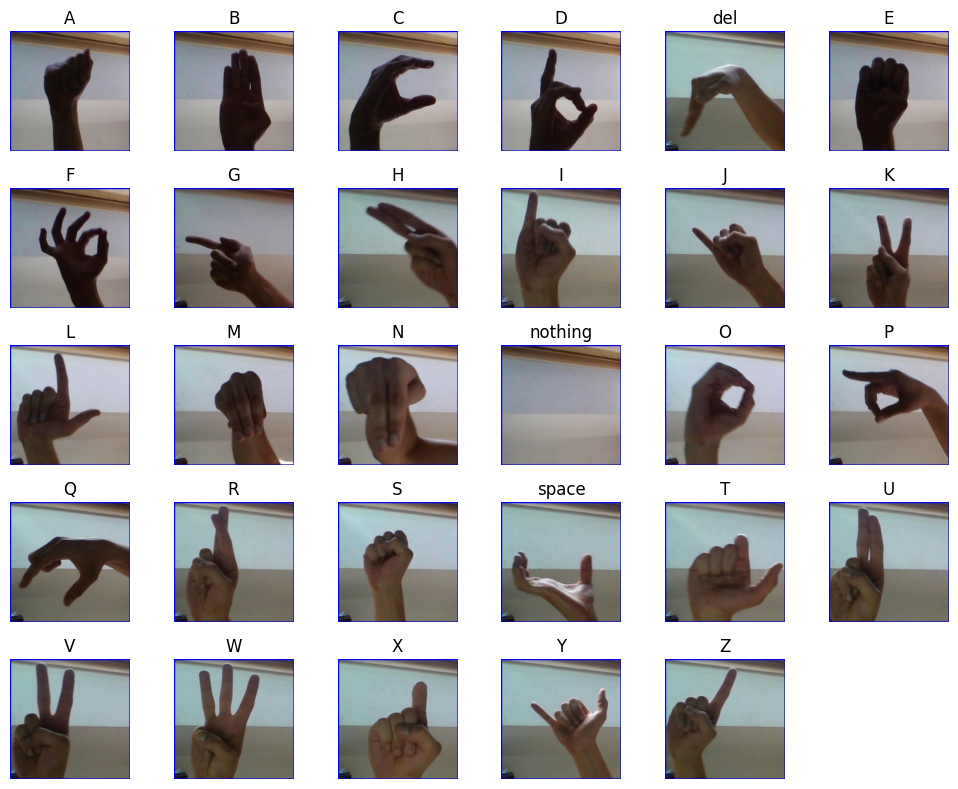

In [3]:
from matplotlib import pyplot as plt
from PIL import Image

plt.figure(figsize=(10,8))
for i, _class in enumerate(classes):

    img_path = os.path.join(DATASET_DIR, TRAIN_DIR) + f"/{_class}/{_class}1.jpg"
    img = Image.open(img_path)
    plt.subplot(5, 6, i+1)
    plt.grid(False)
    plt.title(_class)
    plt.imshow(img)
    plt.axis('off') 

plt.tight_layout()
plt.show()

## MEDIAPIPE TEST

In [4]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Inicjalizacja MediaPipe
mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils

def process_image(image_path):
    try:
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB
        
        # Initialize the Hand Detector
        with mp_hands.Hands(
            static_image_mode=True, # Image - not a video
            max_num_hands=1,
            min_detection_confidence=0.5
            ) as hands:
            results = hands.process(image_rgb)
            
            # If a hand is detected draw points and lines on the oplot
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    # Rysowanie punktów i połączeń
                    mp_draw.draw_landmarks(
                        image_rgb,
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_draw.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=1),
                        mp_draw.DrawingSpec(color=(0, 0, 255), thickness=2)
                    )
                    
                    # Adding numbers to points
                    # for id, landmark in enumerate(hand_landmarks.landmark):
                    #     height, width, _ = image_rgb.shape
                    #     cx, cy = int(landmark.x * width), int(landmark.y * height)
                    #     cv2.putText(image_rgb, str(id), (cx, cy), 
                    #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
            
                return image_rgb
            
            else: return None
            
    
    except Exception as e:
        print(f"Error processing image: {image_path}: {str(e)}")
        return None

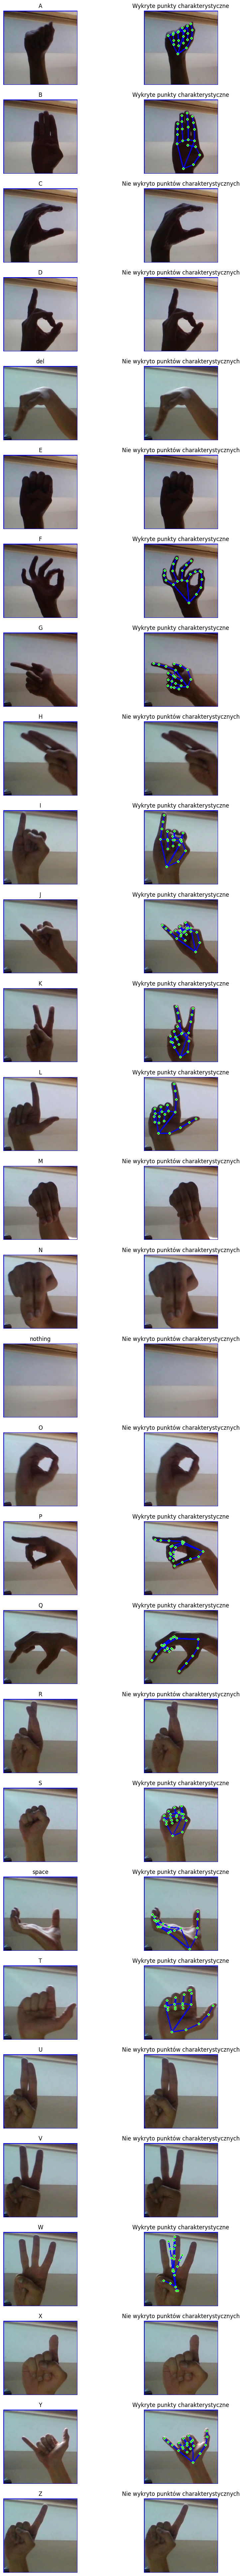

In [5]:
# Dataset mediapipe
plt.figure(figsize=(10, 100))
for idx, _class in enumerate(classes):
    
    img_path = os.path.join(DATASET_DIR, TRAIN_DIR) + f"/{_class}/{_class}1.jpg"
    # Oryginalny obraz
    original_img = Image.open(img_path)
    plt.subplot(29, 2, 2*idx+1)
    plt.title(_class)
    plt.imshow(original_img)
    plt.axis('off')
    
    # Obraz z wykrytymi punktami charakterystycznymi
    processed_img = process_image(img_path)
    plt.subplot(29, 2, 2*idx+2)

    if processed_img is not None:
        plt.title('Wykryte punkty charakterystyczne')
        plt.imshow(processed_img)
        plt.axis('off')
    else:
        plt.title('Nie wykryto punktów charakterystycznych')
        plt.imshow(original_img)
        plt.axis('off')

# plt.tight_layout()
plt.show()

Another test Image

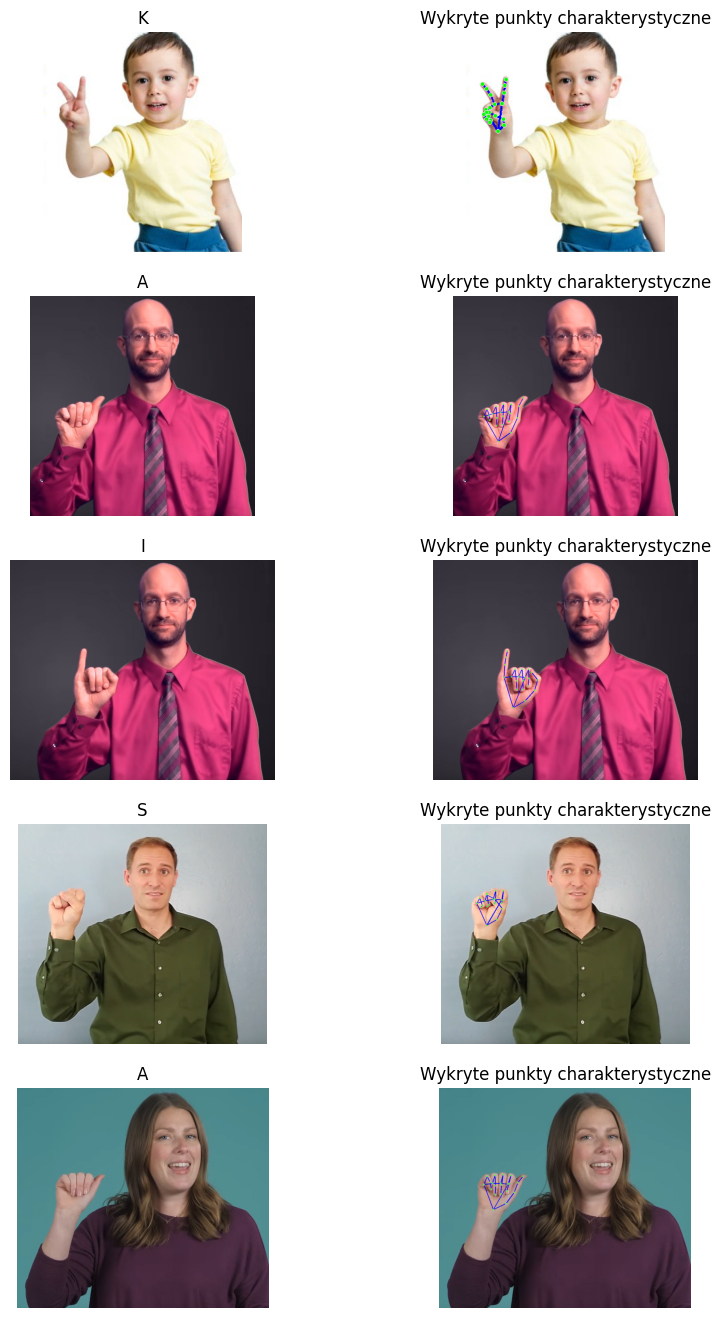

In [7]:

# Test mediapipe
num_images = 6
labels = ["K", "A", "I", "S", "A"]

plt.figure(figsize=(10, 20))
for idx, label in enumerate(labels):
    img_path = DATASET_DIR + f"test_images/test_image#{idx+1}.png"
    # Oryginalny obraz
    original_img = Image.open(img_path)
    plt.subplot(num_images, 2, 2*idx+1)
    plt.title(label)
    plt.imshow(original_img)
    plt.axis('off')

    # Obraz z wykrytymi punktami charakterystycznymi
    processed_img = process_image(img_path)
    plt.subplot(num_images, 2, 2*idx+2)

    if processed_img is not None:
        plt.title('Wykryte punkty charakterystyczne')
        plt.imshow(processed_img)
        plt.axis('off')
    else:
        plt.title('Nie wykryto punktów charakterystycznych')
        plt.imshow(original_img)
        plt.axis('off')

plt.show()